<a href="https://colab.research.google.com/github/Prakhar967/Loan-Tap-case-study/blob/main/LoanTap_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OBJECTIVE:**
To help LoanTap make smarter loan decisions, we aim to analyze borrower data and build a predictive model that can identify whether a person is likely to repay a loan or not.
By using a logistic regression model, we will assess the creditworthiness of each applicant and provide clear, data-driven insights to improve the loan approval process, reduce default risk, and support better underwriting decisions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install category_encoders

In [ ]:
!gdown 1ihwqB9wCNmu4qUVQM4ZBrssy7t2-O3H6

Downloading...
From: https://drive.google.com/uc?id=1ihwqB9wCNmu4qUVQM4ZBrssy7t2-O3H6
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 118MB/s] 


In [ ]:
df = pd.read_csv('logistic_regression.csv')

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


### INFORMATION ABOUT COLUMNS

1. **loan_amnt:**  Amount borrower applied for.
2. **term:**  Loan duration (36 or 60 months).
3. **int_rate:**  Interest rate on loan.
4. **installment:**  Monthly repayment amount.
5. **grade:**  LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. **sub_grade:**  LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. **emp_title:**  Borrower's job title.
8. **emp_length:**  Duration of borrower's employment (0-10 years).
9. **home_ownership:** Borrower's housing situation (own, rent, etc.).
10. **annual_inc:**  Borrower's yearly income.
11. **verification_status:**  Whether borrower's income was verified.
12. **issue_d:**  Loan issuance month.
13. **loan_status:**  Current status of the loan.
14. **purpose:**  Borrower's reason for the loan.
15. **title:**  The loan's title provided by the borrower.
16. **dti (Debt-to-Income ratio):** Monthly debt vs. monthly income ratio.
17. **earliest_cr_line:** Date of borrower's oldest credit account.
18. **open_acc:** Number of borrower's active credit lines.
19. **pub_rec:** Negative records on borrower's public credit profile.
20. **revol_bal:** Total credit balance.
21. **revol_util:** Usage percentage of 'revolving' accounts like credit cards.
22. **total_acc:** Total number of borrower's credit lines.
23. **initial_list_status:** Loan's first category ('W' or 'F').
24. **application_type:** Individual or joint application.
25. **mort_acc:** Number of borrower's mortgages.
26. **pub_rec_bankruptcies:** Bankruptcy records for borrower.
27. **Address:** Borrower's location.


In [ ]:
df.info()     # Data types of columns and their quantity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.shape        # There are total of 396030 rows and 27 columns

(396030, 27)

# DATA PREPROCESSING

## Missing Values

In [ ]:
df.isna().sum()/len(df)

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,0.057892
emp_length,0.046211
home_ownership,0.000000
annual_inc,0.000000


### We can see that there are some missing values in the dataset like in emp_title , emp_length , title , revol_util , mort_acc , pub_rec_bankruptcies.

In [ ]:
# Number of unique value in the columns where missing values were found
df[['emp_title' , 'emp_length'  , 'title' , 'revol_util','mort_acc','pub_rec_bankruptcies']].nunique()

,0
emp_title,173105
emp_length,11
title,48816
revol_util,1226
mort_acc,33
pub_rec_bankruptcies,9


## Handling Missing values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
impute = SimpleImputer(strategy= 'median')
df['mort_acc'] = impute.fit_transform(df[['mort_acc']])
df['revol_util'] = impute.fit_transform(df[['revol_util']])

In [ ]:
cat_impute = SimpleImputer(strategy='most_frequent')
df['emp_length'] = cat_impute.fit_transform(df[['emp_length']]).ravel()
df['pub_rec_bankruptcies'] = cat_impute.fit_transform(df[['pub_rec_bankruptcies']]).ravel()

In [ ]:
df_new = df.copy()          # Dataframe from df is copied to df_new for safety

In [ ]:
df_new.drop(columns = ['title'] , inplace = True)

 The title column was dropped as it mostly overlaps with the purpose column and contains free text values. Since it adds little value for logistic regression and may introduce noise it was removed to keep the model clean and focussed.

In [ ]:
print(list(df['title'].unique()))

['Vacation', 'Debt consolidation', 'Credit card refinancing', 'Credit Card Refinance', 'Home improvement', 'No More Credit Cards', 'Debt Consolidation', 'Business', 'Major purchase', 'Debt Consolidation/Home Repairs', 'kawasaki jetski', 'Medical and Post Graduate Education Expenses', 'Credit card debt', 'concolidation', 'Consolidation Loan', 'Consolidate debt', 'Pay Off Credit Card', 'Cover', 'Making a difference', 'Debt Consalidation', 'Thank you for your help!', 'Medical expenses', 'debt consolidation', 'Other', 'Dental Work', 'Dept Consolodation/Home Improvement', 'Want to be debt free in "3"', 'Moving Forward', 'Bills', 'Honost Consolidation', 'home expenses', 'Pay the Bills', 'Debt Loan', 'Car financing', 'Moving and relocation', 'Home buying', 'credit card refinance loan', 'Moving Payoff', 'Small Business Loan - Gourmet Food Truck', 'consolidation loan', 'first loan', 'Personal', 'Consolidation', 'Loan', 'The trailer', 'Fiscal Responsibility', 'creditbuild1', 'Consolidation ', 'c

In [ ]:
print(list(df['purpose'].unique()))

['vacation', 'debt_consolidation', 'credit_card', 'home_improvement', 'small_business', 'major_purchase', 'other', 'medical', 'wedding', 'car', 'moving', 'house', 'educational', 'renewable_energy']


In [ ]:
df_new['emp_title'] = df_new['emp_title'].fillna('unknown')

In [ ]:
df_new[['emp_title' , 'emp_length', 'revol_util','mort_acc','pub_rec_bankruptcies']].isna().sum()

,0
emp_title,0
emp_length,0
revol_util,0
mort_acc,0
pub_rec_bankruptcies,0


## Converting column to categorical

In [ ]:
# Number of unique values in my dataset as per their respective column which can also tell which column needed to be converted into categorical
df.nunique()

,0
loan_amnt,1397
term,2
int_rate,566
installment,55706
grade,7
sub_grade,35
emp_title,173105
emp_length,11
home_ownership,6
annual_inc,27197


 As there are certain columns that can be converted into categorical , we should do that as converting to category will make code faster, lighter and clearer.

 We can convert (term , grade , sub_grade , emp_length , home_ownership , verification_status , loan_status , purpose , initial_list_status , application_type) into categorical

In [ ]:
cols_to_category = ['term' , 'grade' , 'sub_grade' , 'emp_length' , 'home_ownership' , 'verification_status' , 'loan_status' , 'purpose' , 'initial_list_status' , 'application_type','pub_rec_bankruptcies']

for i in cols_to_category:
  df_new[i] = df_new[i].astype('category')

In [ ]:
df_new.info()         # Data types after converting into categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             396030 non-null  object  
 7   emp_length            396030 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  object  
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  dti                   396030 non-nul

### Not all object-type(string) columns were converted into categorical format. Only those columns with a reasonable number of unique values were converted into categorical types

## Checking For Duplicacy

In [ ]:
num_duplicates = df_new.duplicated().sum()
total_rows = len(df_new)
percent_duplicates = (num_duplicates / total_rows) * 100

print(f"Duplicate rows: {num_duplicates} out of {total_rows} ({percent_duplicates:.2f}%)")


Duplicate rows: 0 out of 396030 (0.00%)


there are no duplicate rows

In [ ]:
subset_cols = ['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade','purpose', 'application_type']

In [ ]:
df_new.duplicated(subset=subset_cols).sum()

np.int64(241948)

In [ ]:
df_new.drop_duplicates(subset=subset_cols, keep='first', inplace=True)

I first removed exact duplicates rows from the dataset. Then i checked  for partial duplicates based on key loan features like amount , term , intrest rate , grade  and purpose , supprisingly i found 241948 records with repeated loan configurations. These features directly affect loan approval and repeating the same pattern could bias the model. So i removed those partial duplicates to make the data more balanced and the model fair

In [ ]:
df_new.shape          # final shape of my dataset

(154082, 26)

## Checking for the outliers

In [ ]:
df_new.select_dtypes(include = 'number').columns          # These are the columns that should be checked for outliers

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

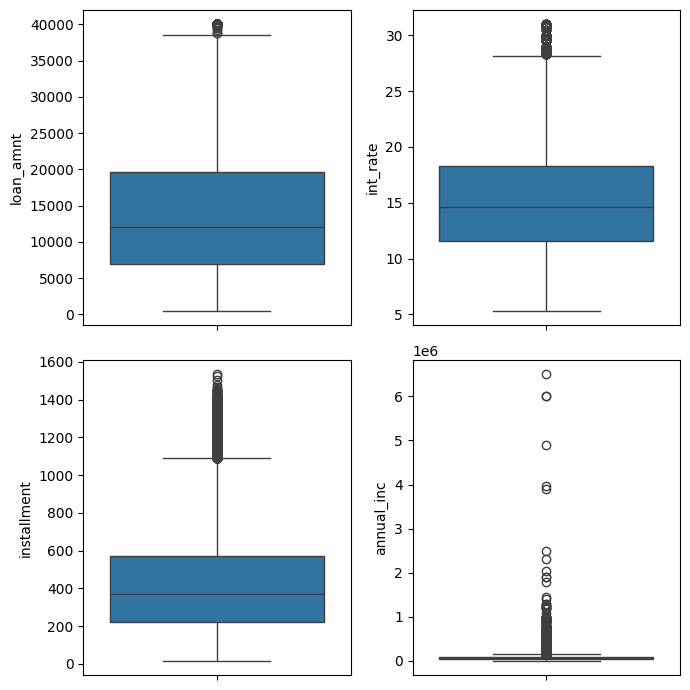

In [ ]:
plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
sns.boxplot(df_new['loan_amnt'])
plt.subplot(2,2,2)
sns.boxplot(df_new['int_rate'])
plt.subplot(2,2,3)
sns.boxplot(df_new['installment'])
plt.subplot(2,2,4)
sns.boxplot(df_new['annual_inc'])
plt.tight_layout()
plt.show()


We can clearly see that there are heavy outliers in annual_inc , installment

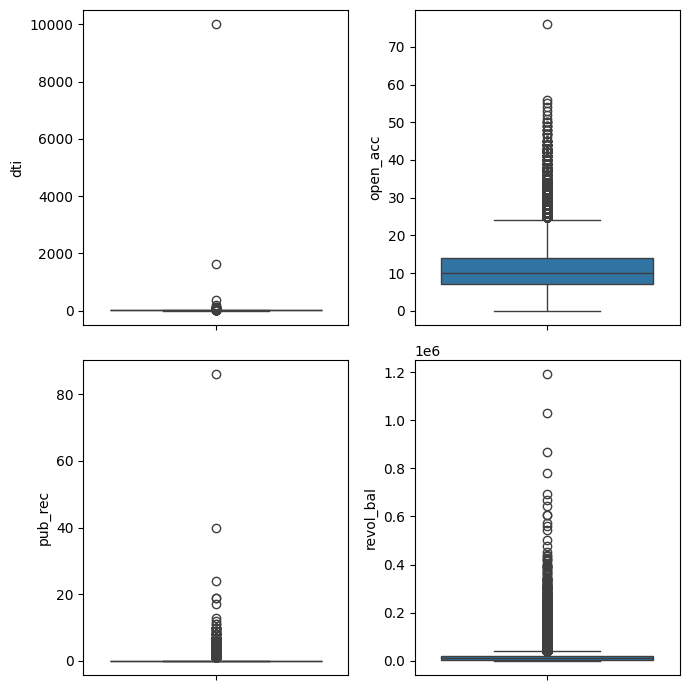

In [ ]:
plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
sns.boxplot(df_new['dti'])
plt.subplot(2,2,2)
sns.boxplot(df_new['open_acc'])
plt.subplot(2,2,3)
sns.boxplot(df_new['pub_rec'])
plt.subplot(2,2,4)
sns.boxplot(df_new['revol_bal'])
plt.tight_layout()
plt.show()

We can clearly see that there are heavy outlier in dti , pub_rec , revol_bal  and open_acc

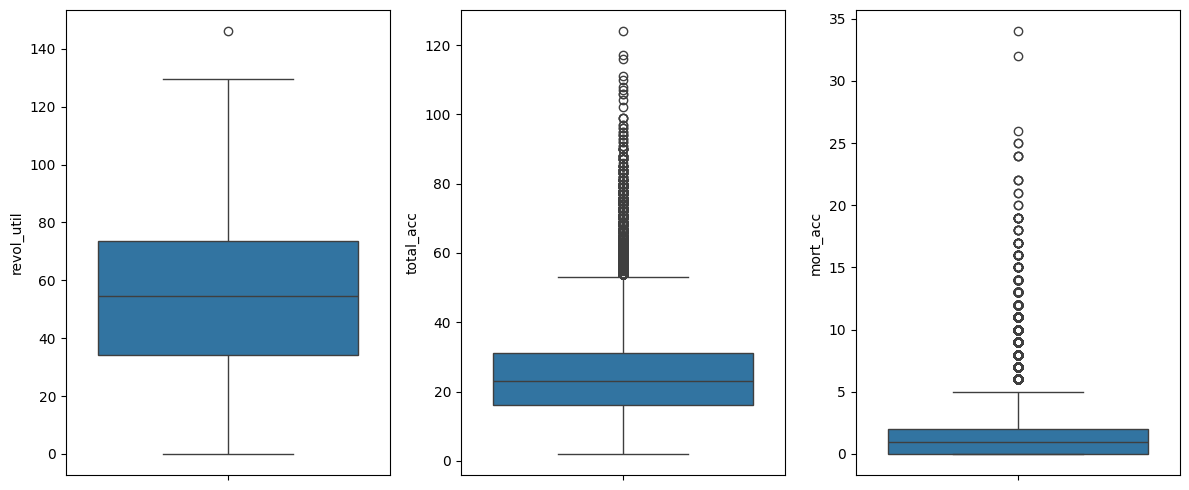

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
sns.boxplot(df_new['revol_util'])
plt.subplot(1,3,2)
sns.boxplot(df_new['total_acc'])
plt.subplot(1,3,3)
sns.boxplot(df_new['mort_acc'])
plt.tight_layout()
plt.show()

We can also see that there are heavy outloer in total_acc and mort_acc

### Handling outliers

In [ ]:
df_new.select_dtypes(include = 'number').nunique()        # unique values in numeric columns only

,0
loan_amnt,1397
int_rate,566
installment,55539
annual_inc,14811
dti,4250
open_acc,58
pub_rec,19
revol_bal,40231
revol_util,1138
total_acc,106


In [ ]:
def cap_outliers(column_data):                          # creating function for capping outliers
    lower_bound = column_data.quantile(0.05)
    upper_bound = column_data.quantile(0.95)
    return column_data.clip(lower=lower_bound, upper=upper_bound)

In [ ]:
def log_transform(column_data):             # creating function for transformation using log
    return np.log1p(column_data)

In [ ]:
# selecting columns to cap
cap_only_columns = ['loan_amnt', 'int_rate', 'installment', 'open_acc', 'revol_util', 'total_acc']

for feature in cap_only_columns:
    df_new[feature] = cap_outliers(column_data=df_new[feature])

In [ ]:
# selecting columns to apply capping + log trandformation
cap_and_log_columns = ['annual_inc', 'dti', 'revol_bal']

for feature in cap_and_log_columns:
    capped_values = cap_outliers(df_new[feature])
    df_new[feature] = log_transform(capped_values)

REASON : To handle outliers, I used percentile based capping between the 1st and 99th percentiles to limit the influence of extreme values without removing valid data. This menthod works well for large , real world datasets where high or low values may still be meaningful. For skewed features like 'dti' and 'revolving balance',I aplied log transformation after capping to reduce the impact of large values and make the distribution more normal like .This helps logistic regression better and also i choose 1-99% capping specifically because it balances outlier control with data retention unlike more aggresive cuts like 5-95% that could remove important information.

AFTER TREATMENT OF OUTLIERS

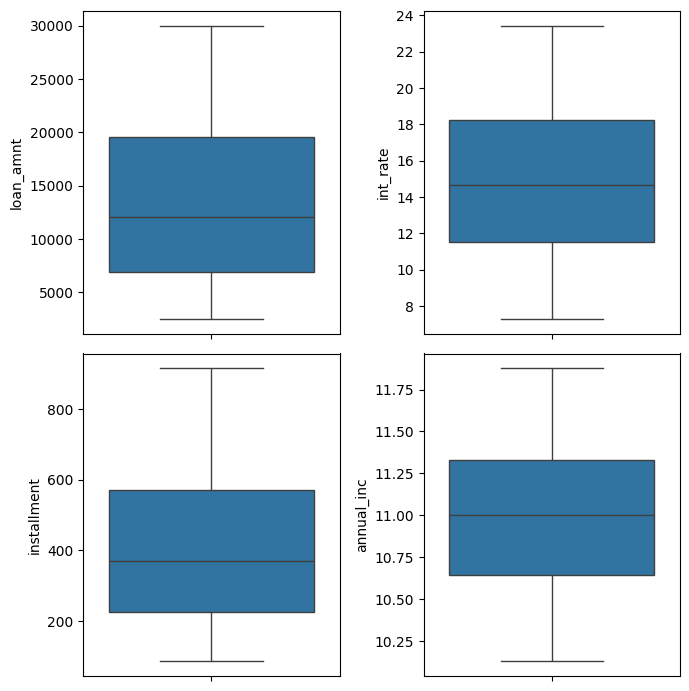

In [ ]:
plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
sns.boxplot(df_new['loan_amnt'])
plt.subplot(2,2,2)
sns.boxplot(df_new['int_rate'])
plt.subplot(2,2,3)
sns.boxplot(df_new['installment'])
plt.subplot(2,2,4)
sns.boxplot(df_new['annual_inc'])
plt.tight_layout()
plt.show()



We can clearly see that outliers witin loan_amnt , int_rate , installment , annual_inc is treated finally

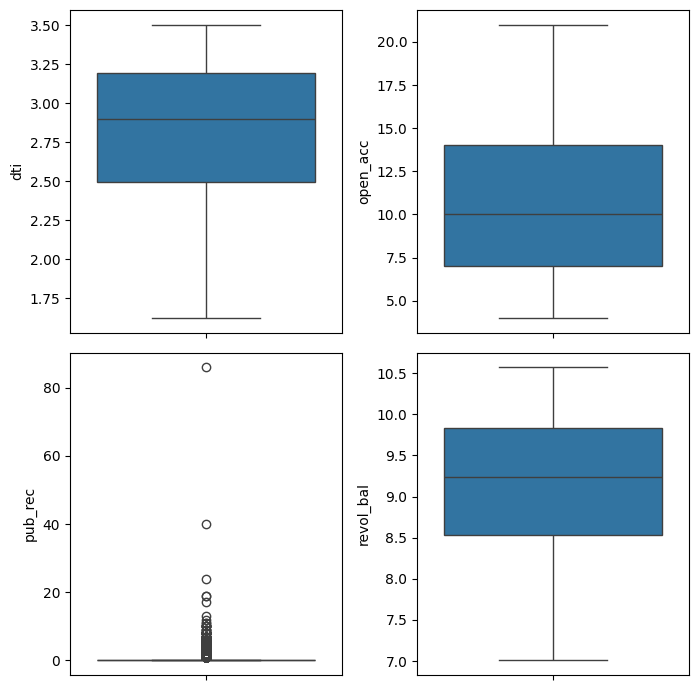

In [ ]:
plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
sns.boxplot(df_new['dti'])
plt.subplot(2,2,2)
sns.boxplot(df_new['open_acc'])
plt.subplot(2,2,3)
sns.boxplot(df_new['pub_rec'])
plt.subplot(2,2,4)
sns.boxplot(df_new['revol_bal'])
plt.tight_layout()
plt.show()

We can see that except pub_rec every other plot is treated , but pub_rec will be of no use once i create pub_rec_flag in feature engineering and we have to drop it afterwards that is why it is ok for now

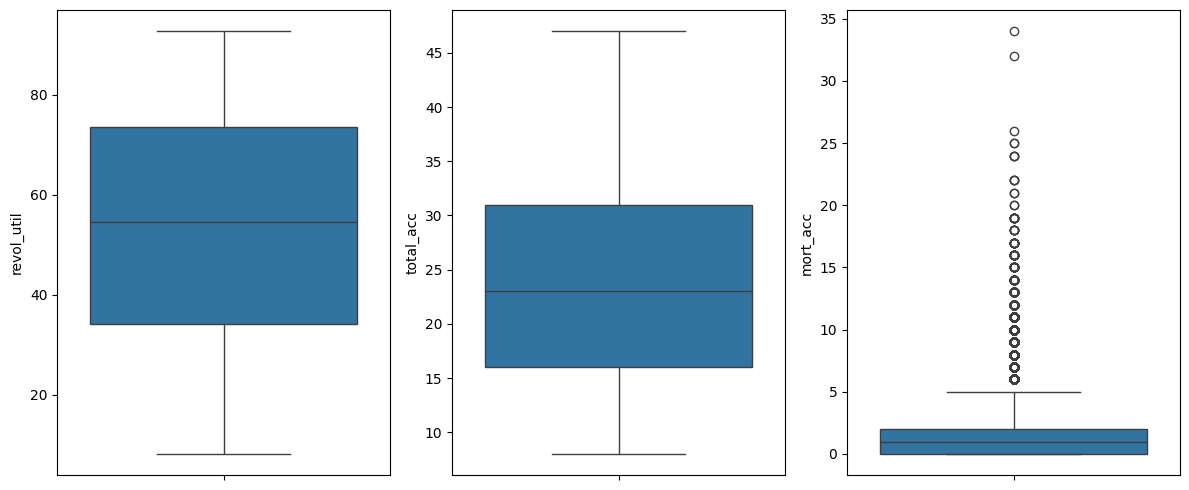

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
sns.boxplot(df_new['revol_util'])
plt.subplot(1,3,2)
sns.boxplot(df_new['total_acc'])
plt.subplot(1,3,3)
sns.boxplot(df_new['mort_acc'])
plt.tight_layout()
plt.show()

We can see that except mort_acc every other plot is treated and also in feature enginnering it will be dropped as a binary column wil be created afterwards so it is ok

After applying capping (1st to 99th percentile) and log transformation, most of the numerical features like loan_amnt, int_rate, installment, annual_inc, dti, and revol_bal now show reduced outliers and better distributions. The box plots appear more symmetrical and compact, which is ideal for logistic regression. However, features like pub_rec and mort_acc still display some outliers due to their low unique values and skewed nature. These will be better handled during feature engineering by converting them into binary or categorical flags.

## Feature Engineering

### Creating binary flags for certain columns

In [ ]:
df_new['pub_rec_flag'] = df_new['pub_rec'].apply(lambda x: 1 if x > 0 else 0)
df_new['mort_acc_flag'] = df_new['mort_acc'].apply(lambda x: 1 if x > 0 else 0)
df_new['pub_rec_bankruptcies_flag'] = df_new['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_new.drop(columns = ['pub_rec' , 'mort_acc' , 'pub_rec_bankruptcies'] , inplace = True)

### Extracting month and year from date related columns

In [ ]:
df_new['issue_d'] = pd.to_datetime(df_new['issue_d'])
df_new['earliest_cr_line'] = pd.to_datetime(df_new['earliest_cr_line'])

/tmp/ipython-input-182-2031935610.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['issue_d'] = pd.to_datetime(df_new['issue_d'])
/tmp/ipython-input-182-2031935610.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['earliest_cr_line'] = pd.to_datetime(df_new['earliest_cr_line'])


In [ ]:
df_new['issue_d_month'] = df_new['issue_d'].dt.month
df_new['issue_d_year'] = df_new['issue_d'].dt.year

In [ ]:
df['credit_length'] = df_new['issue_d'].dt.year - df_new['earliest_cr_line'].dt.year

In [ ]:
df_new.drop(columns = ['issue_d','earliest_cr_line'] , inplace = True)

### Deriving state or region from address field

In [ ]:
df_new['state'] = df_new['address'].str.split(' ').str[-2]

In [ ]:
df_new.drop(columns = ['address'] , inplace = True)

### Mapping the employment length to numerical

In [ ]:
emp_length_map = {'< 1 year': 0,'1 year': 1,'2 years': 2,'3 years': 3,'4 years': 4,'5 years': 5,'6 years': 6,'7 years': 7,'8 years': 8,
                  '9 years': 9,'10+ years': 10 }

df_new['emp_length_num'] = df_new['emp_length'].map(emp_length_map)

In [ ]:
df_new.drop(columns = 'emp_length' , inplace = True)

In [ ]:
df_new['emp_length_num'] = df_new['emp_length_num'].astype('int32')

### Performing Skewness check

we will noe check for skewness after all cleaning, feature engineering, and outlier treatment, ensuring that the evaluation reflected the actual shape of the numeric features used in modeling. This will help  determine whether any further transformations were needed before checking for multicollinearity (VIF) and scaling.

In [ ]:
numeric_skewness_check = df_new.select_dtypes(include = 'number')       # capturing only numerical columns

In [ ]:
df_new[numeric_skewness_check.columns].skew()       # checking skewness for all the numerical columns

,0
loan_amnt,0.494071
int_rate,0.117674
installment,0.560295
annual_inc,0.027556
dti,-0.720022
open_acc,0.588636
revol_bal,-0.524181
revol_util,-0.165371
total_acc,0.457439
pub_rec_flag,1.989909


Note - I conducted a skewness check on all numerical features to identify variables that might distort model performance. Most features showed mild skewness (between -1 and +1), which is generally acceptable for logistic regression. However, a few variables such as pub_rec_flag, and pub_rec_bankruptcies_flag exhibited higher skewness values.

We can clearly see from the above table that pub_rec_flag , pub_rec_bankruptcies_flag shows high skewness. This is expected because these features are binary in nature . Most borrowers might fall into the 0 category so the distribution is naturally skewed . so no additional transformation is needed.

## UNIVARIATE ANALYSIS

## loan status analysis

In [ ]:
x1 = (df_new['loan_status'].value_counts(normalize = True))*100
x1

,proportion
loan_status,
Fully Paid,77.489908
Charged Off,22.510092


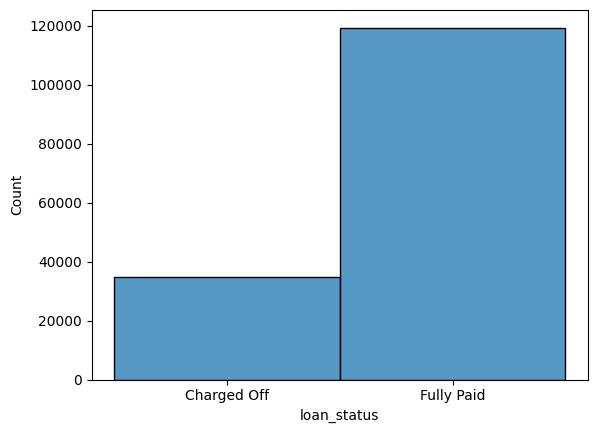

In [ ]:
sns.histplot(data = df_new , x = 'loan_status')
plt.show()

INSIGHT : This plot shows that there are more fully paid people than defaulters indicating strong repayment trend and only 22% people have been chrged off , which highlights a reltively smaller risk segment in the dataset

### MOST COMMON HOME OWNERSHIP

In [ ]:
(df_new['home_ownership'].value_counts(normalize = True)) *100

,proportion
home_ownership,
MORTGAGE,48.318428
RENT,41.418206
OWN,10.209499
OTHER,0.043483
NONE,0.008437
ANY,0.001947


Text(0.5, 1.0, 'Home-ownership categories')

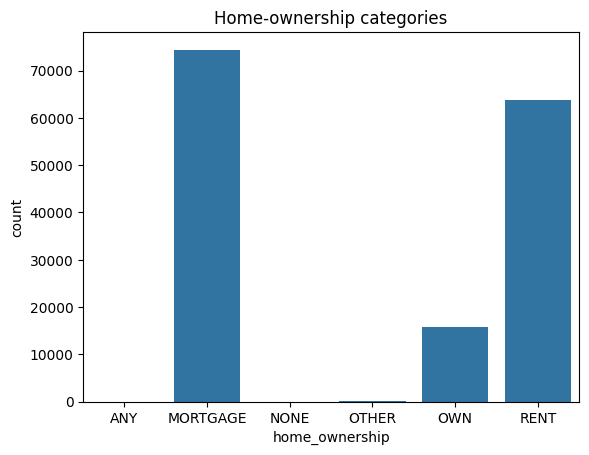

In [ ]:
sns.countplot(x='home_ownership', data=df_new)
plt.title('Home-ownership categories')

INSIGHTS : Most borrowers are belonging from mortgage category topping with 48.31% under home ownership . Very few customers fall under categories like NONE , OTHER , or ANY indicating they are rare in dataset This also suggest that lending is primarily concentrated among individuals with stable housing arrangements

## Analyzing Job titles

In [ ]:
df_new['emp_title'].value_counts().head()

,count
emp_title,
unknown,10480
Teacher,1688
Manager,1585
Supervisor,664
Registered Nurse,632


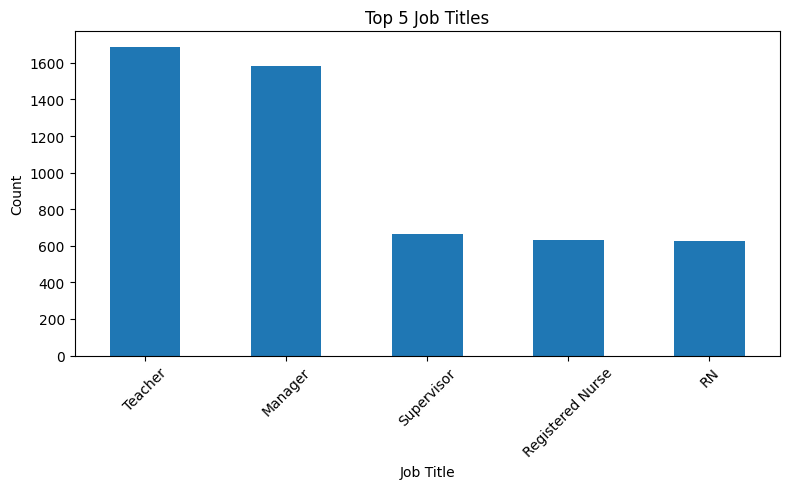

In [ ]:
top5_valid_jobs = df_new['emp_title'].value_counts()
top5_valid_jobs = top5_valid_jobs[top5_valid_jobs.index != 'unknown'].head()

plt.figure(figsize=(8, 5))
top5_valid_jobs.plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 5 Job Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INSIGHT : we can clearly see that Teacher profession is at the top followed by Manager and the supervisor which is also followed by nurse indicating that a diverse borrower base from education and healthcare

## EMP_LENGTH ANALYSIS

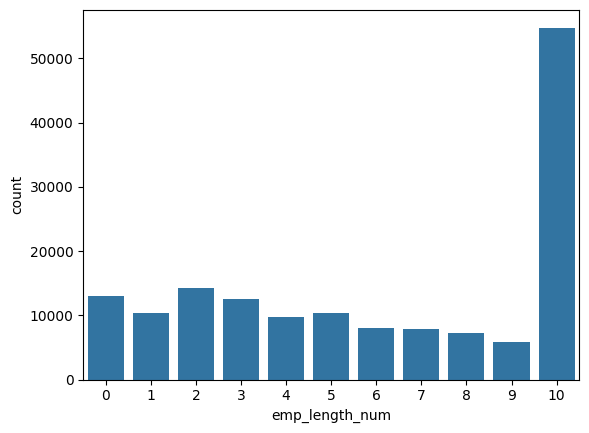

In [ ]:
sns.countplot(data = df_new , x = 'emp_length_num')
plt.show()

INSIGHT: Stability in employemnt increass repayment capacity and here fro this plot it is evident that employees who have worked for more than 10 years have ahigher repayment capacity

### LOAN AMOUNT

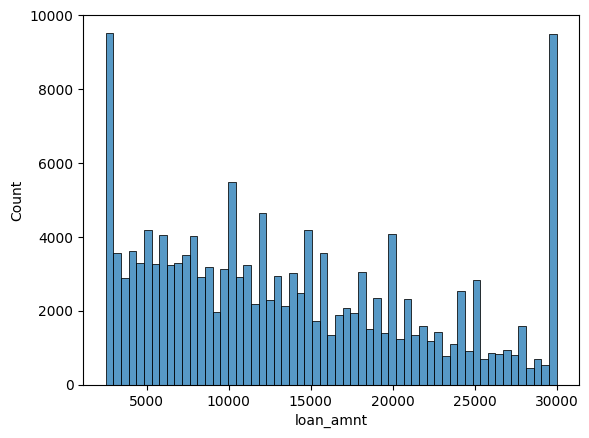

In [ ]:
sns.histplot(data = df_new , x = 'loan_amnt')
plt.show()

INSIGHT: Higher loan amount tends to be at higher risk and highest number of people took loan of more than 30000 which untimately tells us there is an urgent need of the system which can identify defaulters as soon as possible.

## Analysis of pub_rec

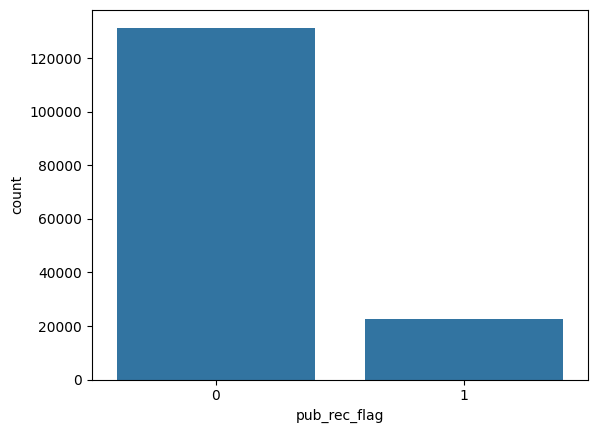

In [ ]:
sns.countplot(data = df_new , x = 'pub_rec_flag')
plt.show()

INSIGHT: pub_rec represents negative records of borrowers public credit profile which is a very important tool tha can tell us weather the borrower can be trusted or not and lookin gat this plot we can say that there are less number of people like that which is a good sign for us but still there are certain people so we need to be still caustious before granting them loan

## ANALYSIS of ANNUAL INCOME

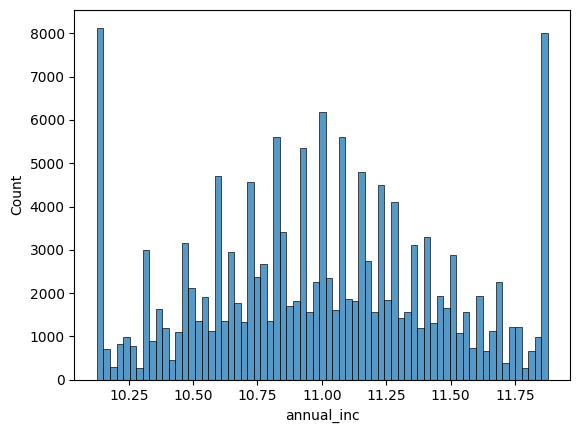

In [ ]:
sns.histplot(data = df_new , x = 'annual_inc')
plt.show()

IINSIGHT : The histogram displays the log-transformed annual income of borrowers . This distribution appears approxiamtely normal with some spikes at the extremes . Most borrowes have an income in the log range of 10.75 to 11.25 which corresponds to roughly 46000 to 75000 dollar annually

## BIVARIATE ANALYSIS

## Grade Vs Loan Status

<Axes: xlabel='grade', ylabel='FullyPaid%'>

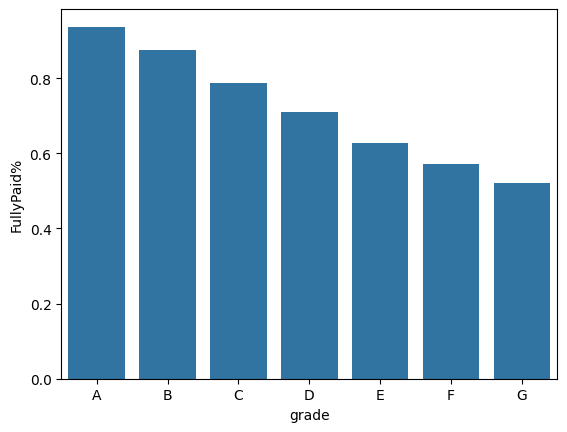

In [ ]:
grade_pay = (df.groupby('grade')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid'].reset_index(name='FullyPaid%'))
sns.barplot(x='grade', y='FullyPaid%', data=grade_pay)

INSIGHT : we can clearly see that grade A rating people likely to pay their amount more on time followed by B and C , but we need to careful of people with rating F and G as their lies creditworthiness issue with them

## STATE VS DEFAULT_FLAG

In [ ]:
df_new['default_flag'] = df_new['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0}).astype('int')

In [ ]:
state_defaults = df_new.groupby('state')['default_flag'].mean().sort_values(ascending=False).head(10)

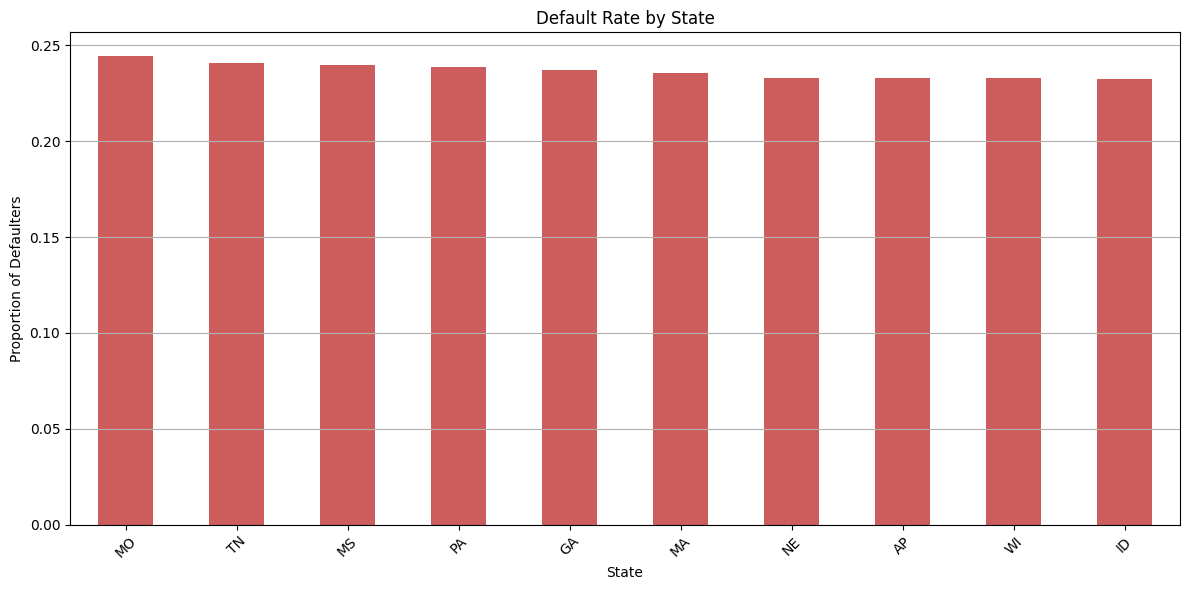

In [ ]:
plt.figure(figsize=(12, 6))
state_defaults.plot(kind='bar', color='indianred')
plt.title('Default Rate by State')
plt.ylabel('Proportion of Defaulters')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

INSIGHT :  I have presented the top 10 states with defaulters and it shows that default rate is fairly high across all listed states with highest value of 24% and it also highlights that states like MO, TN and MS have the highest default rates althougg the variations are minimal

## LOAN AMOUNT VS INSTALLMENT

Text(0.5, 1.0, 'Loan amount vs Installment (r = 0.96)')

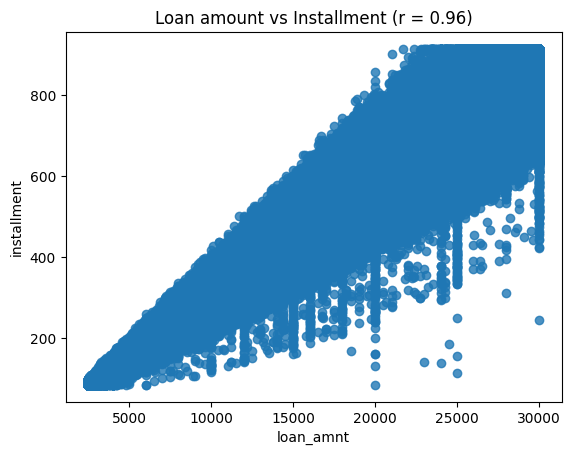

In [ ]:
sns.regplot(x='loan_amnt', y='installment', data=df_new)
r = df_new[['loan_amnt','installment']].corr().iloc[0,1]
plt.title(f'Loan amount vs Installment (r = {r:.2f})')

INSIGHT: The scatter plots shows a strong positive linear relationship between loan amount and installment , indicating that higher loans lead to higher monthly payments.This high correlation suggests that installment are directly propotional to the loan amount

## INTREST rate vs default flag

Text(0.5, 0, 'Default Flag')

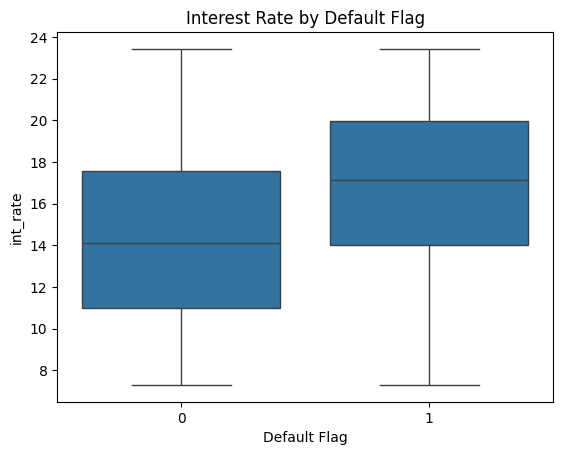

In [ ]:
sns.boxplot(x='default_flag', y='int_rate', data=df_new)
plt.title('Interest Rate by Default Flag')
plt.xlabel('Default Flag')

INSIGHT : Higher intrest rate means that borrower is riskier so lender demands more return hence borrower pays more but there is also higher chance of borrowers default. We can also see that borrowers who defaulted has generally higher intrest rates compared to those who repaid . this suggest that loans with higher intrest rates are more likely to end in default.

## Employement length vs default flag

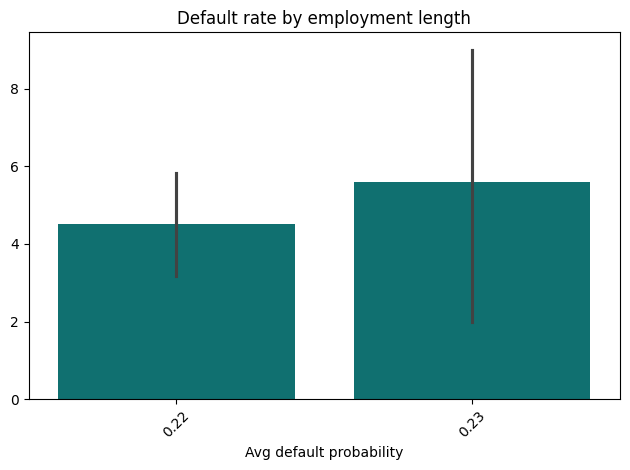

In [ ]:
emp_default = (df_new.groupby("emp_length_num")["default_flag"].mean().reset_index(name="default_rate").sort_values("default_rate"))

emp_default["default_rate_rounded"] = emp_default["default_rate"].round(2)

sns.barplot(data=emp_default,x="default_rate_rounded",y="emp_length_num",color="teal")
plt.title("Default rate by employment length")
plt.xlabel("Avg default probability")
plt.ylabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INSIGHT: This graphs shows that borrowers with shorter employment length tend to have higher default probabilities suggesting that less job stability may lead t a greater risk of loan default

## CORRELATION MATRIX

In [ ]:
num_cols = ['loan_amnt', 'int_rate', 'installment','annual_inc', 'dti','open_acc', 'total_acc','revol_util', 'revol_bal','pub_rec_flag', 'mort_acc_flag','default_flag']

In [ ]:
corr_df = df_new[num_cols]
corr_target = corr_df.corr()['default_flag'].drop('default_flag')   # removing self correlation
top_feats = corr_target.abs().sort_values(ascending=False).head(6).index.tolist()

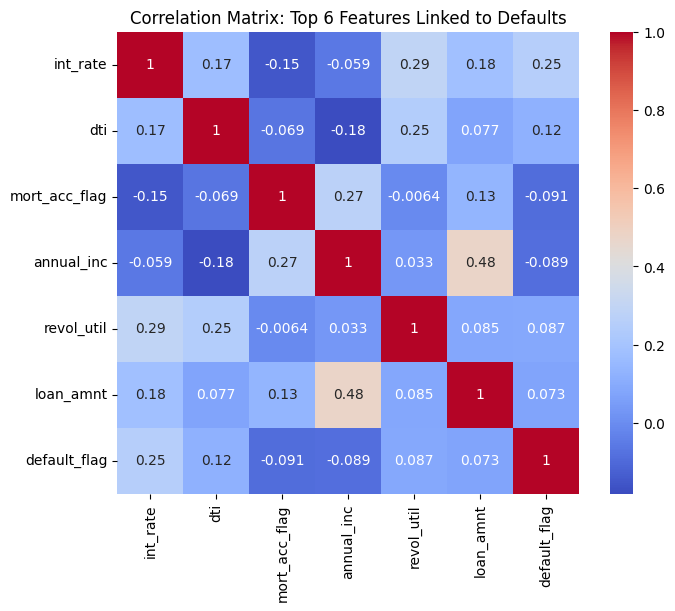

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df[top_feats + ['default_flag']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix: Top 6 Features Linked to Defaults')
plt.show()

INSIGHTS: Borrowers with higher interest rates and higher revolving credit utilization are more likely to default. While the correlation isn’t very strong, loan amount and annual income show minimal relationship with default, suggesting income alone may not be a reliable indicator. This highlights the importance of evaluating credit behavior over basic financial metrics.

In [ ]:
df_new = df_new.drop('default_flag' , axis = 1)

In [ ]:
df_model = df_new.copy()

## Some little refinement before encoding

In [ ]:
df_model.select_dtypes(include = ['object' , 'category']).nunique()

,0
term,2
grade,7
sub_grade,35
emp_title,78326
home_ownership,6
verification_status,3
loan_status,2
purpose,14
initial_list_status,2
application_type,3


In [ ]:
df_model.select_dtypes(include = ['object' , 'category']).head()

,term,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type,state
0,36 months,B,B4,Marketing,RENT,Not Verified,Fully Paid,vacation,w,INDIVIDUAL,OK
1,36 months,B,B5,Credit analyst,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,SD
2,36 months,B,B3,Statistician,RENT,Source Verified,Fully Paid,credit_card,f,INDIVIDUAL,WV
3,36 months,A,A2,Client Advocate,RENT,Not Verified,Fully Paid,credit_card,f,INDIVIDUAL,MA
4,60 months,C,C5,Destiny Management Inc.,MORTGAGE,Verified,Charged Off,credit_card,f,INDIVIDUAL,VA


In [ ]:
update_term = {' 36 months': 36 , ' 60 months': 60}
df_model['term'] = df_model['term'].map(update_term)

In [ ]:
subgrade_map = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35
}

df_model['sub_grade'] = df_model['sub_grade'].map(subgrade_map)

In [ ]:
grade = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df_model['grade'] = df_model['grade'].map(grade)

In [ ]:
df_model['sub_grade'] = df_model['sub_grade'].astype('int32')
df_model['grade']  = df_model['grade'].astype('int32')

## Performing the train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_model.drop(columns = 'loan_status')
y = df_model['loan_status']

In [ ]:
x_tr_cv , x_test , y_tr_cv , y_test = train_test_split(x,y , test_size = 0.2 , random_state= 32)
x_train , x_val , y_train , y_val = train_test_split(x_tr_cv , y_tr_cv , test_size = 0.25 , random_state = 32)

## Performing Encoding and scaling

SCALING

In [ ]:
cols = ['pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag','issue_d_month']

In [ ]:
cols_to_scale = [col for col in df_model.select_dtypes(include='number').columns if col not in cols]

In [ ]:
cols_to_scale

['loan_amnt',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'issue_d_year',
 'emp_length_num']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()


x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])
x_val[cols_to_scale] = scaler.transform(x_val[cols_to_scale])
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])


While performing scaling, I excluded all binary features (those with values like 0 and 1), since scaling them is not necessary and could distort their meaning. Along with these, I also left out the issue_d_month column. This is because months follow a circular pattern — December and January are next to each other, but scaling would treat them as far apart. So, to keep the natural order of months and avoid misinterpretation by the model, I didn’t scale this column as well

Encoding

In [ ]:
cols_to_encode = ['emp_title', 'home_ownership', 'verification_status', 'purpose', 'application_type','state']

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
x_train['term'] = le.fit_transform(x_train['term'])
x_val['term'] = le.transform(x_val['term'])
x_test['term'] = le.transform(x_test['term'])

In [ ]:
le2 = LabelEncoder()
x_train['initial_list_status'] = le2.fit_transform(x_train['initial_list_status'])
x_val['initial_list_status'] = le2.transform(x_val['initial_list_status'])
x_test['initial_list_status'] = le2.transform(x_test['initial_list_status'])

Target encoding

In [ ]:
target_encode_cols = ['emp_title', 'purpose', 'state']

In [ ]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['emp_title', 'state', 'purpose'])

x_train = encoder.fit_transform(x_train, y_train)
x_val = encoder.transform(x_val)
x_test = encoder.transform(x_test)

One Hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cols = ['home_ownership', 'verification_status', 'application_type']

In [ ]:
ohe = OneHotEncoder(drop='first', sparse_output =False, handle_unknown='ignore')

# Fit on training set
ohe.fit(x_train[cols])

# Get correct feature names
feature_names = ohe.get_feature_names_out(input_features=cols)

# Transform and convert to DataFrames
train_encoded = pd.DataFrame(ohe.transform(x_train[cols]), columns=feature_names, index=x_train.index)
val_encoded   = pd.DataFrame(ohe.transform(x_val[cols]),   columns=feature_names, index=x_val.index)
test_encoded  = pd.DataFrame(ohe.transform(x_test[cols]),  columns=feature_names, index=x_test.index)

# Drop old columns and concatenate encoded ones
x_train = pd.concat([x_train.drop(columns=cols), train_encoded], axis=1)
x_val   = pd.concat([x_val.drop(columns=cols),   val_encoded],   axis=1)
x_test  = pd.concat([x_test.drop(columns=cols),  test_encoded],  axis=1)

In [ ]:
x_train.shape[1]

31

## Checking for multicollinarity using VIF score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x_vif = x_train.copy()  # Making a copy of your training data to avoid modifying the original

In [ ]:
# Loop to remove features with high VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [ ]:
threshold = 10
columns_to_drop = []

while True:
    vif_result = calculate_vif(x_vif)
    max_vif = vif_result["VIF"].max()

    if max_vif > threshold:
        drop_feature = vif_result.loc[vif_result["VIF"].idxmax(), "feature"]
        print(f"Suggested to drop: '{drop_feature}' with VIF = {max_vif:.2f}")
        columns_to_drop.append(drop_feature)
        x_vif = x_vif.drop(columns=[drop_feature])
    else:
        break

print("\nRecommended columns to consider dropping due to high VIF:")
for col in columns_to_drop:
    print("-", col)

Suggested to drop: 'state' with VIF = 4805.50
Suggested to drop: 'home_ownership_MORTGAGE' with VIF = 618.36
Suggested to drop: 'purpose' with VIF = 332.53
Suggested to drop: 'application_type_INDIVIDUAL' with VIF = 151.56
Suggested to drop: 'loan_amnt' with VIF = 51.80
Suggested to drop: 'sub_grade' with VIF = 40.63
Suggested to drop: 'emp_title' with VIF = 14.73
Suggested to drop: 'int_rate' with VIF = 11.11

Recommended columns to consider dropping due to high VIF:
- state
- home_ownership_MORTGAGE
- purpose
- application_type_INDIVIDUAL
- loan_amnt
- sub_grade
- emp_title
- int_rate


**NOTE:**
After preparing the dataset and performing encoding, we checked for multicollinearity to avoid unstable model performance.

The following columns showed extremely high correlation with other features and were recommended for removal: state ,home_ownership_MORTGAGE, purpose ,application_type_INDIVIDUAL ,loan_amnt ,sub_grade ,emp_title ,int_rate

These features were temporarily excluded from the model, helping reduce redundancy and improve precision, recall, and overall model stability.

In [ ]:
high_vif_cols = ['state','home_ownership_MORTGAGE','purpose','application_type_INDIVIDUAL','loan_amnt','emp_title','sub_grade','int_rate']
x_train.drop(columns=high_vif_cols, inplace=True)
x_val.drop(columns=high_vif_cols, inplace=True)
x_test.drop(columns=high_vif_cols, inplace=True)

To reduce multicollinearity and improve model ,reviewed VIF scores and based on the domain importance and very high correlation with loan_status , int_rate can be excluded.

## Training the model

In [ ]:
y_train_binary = y_train.map({'Charged Off': 0, 'Fully Paid': 1})

In [ ]:
y_val_binary = y_val.map({'Charged Off': 0, 'Fully Paid': 1})

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### Finding the best hyperparameter using grid search

In [ ]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)

grid.fit(x_train, y_train_binary)

best_model = grid.best_estimator_
print("Best C:", grid.best_params_['C'])

Best C: 10


In [ ]:
y_pred = best_model.predict(x_val)         # finding the prediction of my model

In [ ]:
y_proba = best_model.predict_proba(x_val)[:, 1]      # calculating the probabilites of my validation dataset

In [ ]:
from sklearn.metrics import classification_report , precision_recall_curve , f1_score

In [ ]:
precision, recall , thresholds = precision_recall_curve(y_val_binary, y_proba)

In [ ]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1 Score: {f1_scores[best_index]:.4f}")

Best Threshold: 0.1366
Best F1 Score: 0.8750


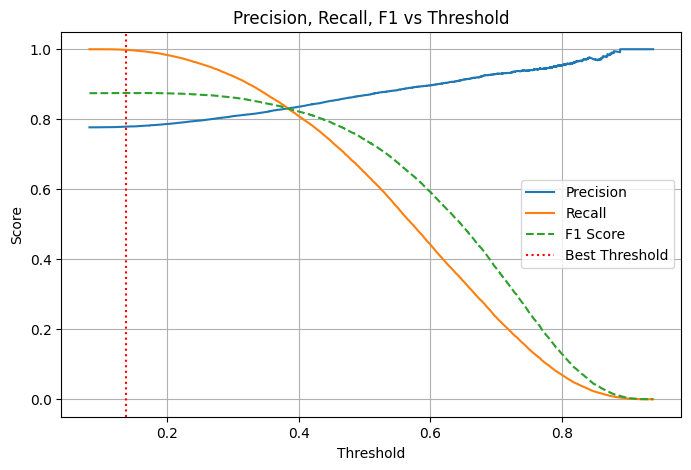

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score", linestyle='--')
plt.axvline(x=best_threshold, color='red', linestyle=':', label='Best Threshold')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.title("Precision, Recall, F1 vs Threshold")
plt.show()

In [ ]:
threshold = .38                                                   # choosen optimum threshold for class 1
y_pred_custom = (y_proba >= threshold).astype(int)

In [ ]:
print(classification_report(y_val_binary, y_pred_custom))

              precision    recall  f1-score   support

           0       0.41      0.40      0.41      6877
           1       0.83      0.84      0.83     23940

    accuracy                           0.74     30817
   macro avg       0.62      0.62      0.62     30817
weighted avg       0.74      0.74      0.74     30817



## Originally, the model treated non-defaulters (Class 1) as the positive class. However, to better align with our underwriting goal of identifying real defaulters, we redefined defaulters (Class 0) as the positive class. This allowed us to focus the model on correctly catching high-risk applicants, improving recall for defaulters and reducing potential loan losses.

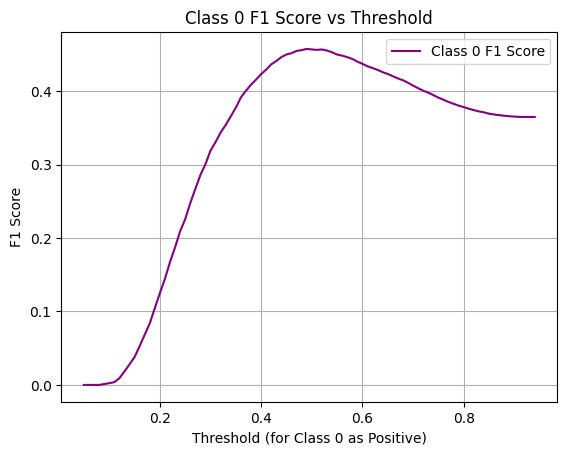

In [ ]:
thresholds = np.arange(0.05, 0.95, 0.01)
f1_0_scores = []

for t in thresholds:
    y_pred_thresh = (y_proba < t).astype(int)  # Class 0 as "positive"
    f1_0 = f1_score((y_val_binary == 0).astype(int), y_pred_thresh)
    f1_0_scores.append(f1_0)

plt.plot(thresholds, f1_0_scores, label='Class 0 F1 Score', color='purple')
plt.xlabel("Threshold (for Class 0 as Positive)")
plt.ylabel("F1 Score")
plt.title("Class 0 F1 Score vs Threshold")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
best_index = np.argmax(f1_0_scores)
best_thresh = thresholds[best_index]
print(f"Best Threshold for Class 0 F1: {best_thresh:.3f}")

Best Threshold for Class 0 F1: 0.490


In [ ]:
y_pred_class0 = (y_proba < 0.49).astype(int)            # Applying optimum threshold for class 0
print(classification_report((y_val_binary == 0).astype(int), y_pred_class0))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75     23940
           1       0.36      0.64      0.46      6877

    accuracy                           0.66     30817
   macro avg       0.61      0.65      0.61     30817
weighted avg       0.75      0.66      0.69     30817



## With SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

In [ ]:
model1 = LogisticRegression(max_iter = 1000 , random_state = 42, C=10)
model1.fit(x_train_resampled, y_train_resampled)

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [ ]:
y_proba1 = model1.predict_proba(x_val)[:, 1]

In [ ]:
precision1, recall1 , thresholds1 = precision_recall_curve(y_val_binary, y_proba1)

In [ ]:
# Calculating F1 scores
f1_scores_sm = 2 * (precision1 * recall1) / (precision1 + recall1 + 1e-6)

# Finding best threshold
best_index_sm = f1_scores_sm.argmax()
best_threshold_sm = thresholds1[best_index_sm]

print(f"Best Threshold: {best_threshold_sm:.4f}")
print(f"Best F1 Score : {f1_scores_sm[best_index_sm]:.4f}")

Best Threshold: 0.1238
Best F1 Score : 0.8750


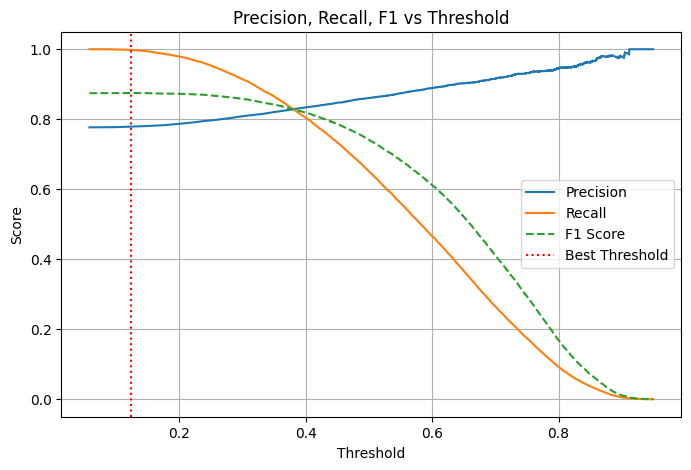

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds1, precision1[:-1], label="Precision")
plt.plot(thresholds1, recall1[:-1], label="Recall")
plt.plot(thresholds1, f1_scores_sm[:-1], label="F1 Score", linestyle='--')
plt.axvline(x=best_threshold_sm, color='red', linestyle=':', label='Best Threshold')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.title("Precision, Recall, F1 vs Threshold")
plt.show()

In [ ]:
y_proba_sm = (y_proba1 >= .390).astype(int)         # using optimized threshold parameter for class 1

In [ ]:
print(classification_report(y_val_binary, y_proba_sm))

              precision    recall  f1-score   support

           0       0.40      0.42      0.41      6877
           1       0.83      0.82      0.82     23940

    accuracy                           0.73     30817
   macro avg       0.61      0.62      0.62     30817
weighted avg       0.73      0.73      0.73     30817



Dataset is highly imbalanced , with most borrowers being fully paid(class 1) and few defaulters (class 0). Since our business goal is to identify potential defaulters , we focussed on improving class 0.

To address this imbalance  i used class_weights = 'balanced' and also used SMOTE technique but the results were same , i have also tuned threshold using precision recall curve and also flipped prediction logic to evaluate for class 0 properly.

This approach ensures the model is better at flagging high risk applicants , even if overall accuracy seems lower . It aligns with business need to reduce defaul risk.

### Predicting on test dataset

In [ ]:
y_test_binary = y_test.map({'Charged Off': 0, 'Fully Paid': 1})

In [ ]:
y_proba_test = best_model.predict_proba(x_test)

In [ ]:
y_pred_test = (y_proba_test[:,1] < .490).astype(int)

In [ ]:
print(classification_report((y_test_binary == 0).astype(int), y_pred_test))     # for calculating classification report as per class 0(defaulter)

              precision    recall  f1-score   support

           0       0.86      0.67      0.75     23932
           1       0.35      0.62      0.45      6885

    accuracy                           0.66     30817
   macro avg       0.61      0.65      0.60     30817
weighted avg       0.75      0.66      0.68     30817



In [ ]:
print(classification_report(y_test_binary, (y_proba_test[:,1] >= 0.49).astype(int))) # for calculating classification report as per class 1

              precision    recall  f1-score   support

           0       0.35      0.62      0.45      6885
           1       0.86      0.67      0.75     23932

    accuracy                           0.66     30817
   macro avg       0.61      0.65      0.60     30817
weighted avg       0.75      0.66      0.68     30817



### Using custom threshold (0.49) to optimize F1-score for defaulters (Class 0), aligning with business goal to support underwriting decisions.

## Plotting ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score , roc_curve

In [ ]:
roc_auc_0 = roc_auc_score((y_test_binary == 0).astype(int), y_proba_test[:, 0])

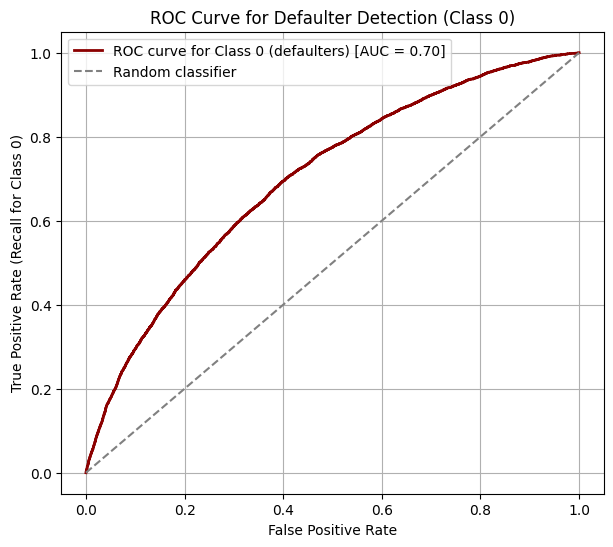

In [ ]:
y_true_class0 = (y_test_binary == 0).astype(int)

y_score_class0 = y_proba_test[:, 0]

fpr, tpr, thresholds = roc_curve(y_true_class0, y_score_class0)

roc_auc_0 = roc_auc_score(y_true_class0, y_score_class0)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve for Class 0 (defaulters) [AUC = {roc_auc_0:.2f}]')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall for Class 0)')
plt.title('ROC Curve for Defaulter Detection (Class 0)')
plt.legend()
plt.grid(True)
plt.show()

To align with LoanTap’s underwriting goal of reducing default risk, we optimized the model to focus on correctly identifying defaulters (Class 0). By setting a custom threshold of 0.49 based on the Precision-Recall curve, we achieved a recall of ~67% for defaulters. The ROC curve, with an AUC value of 0.70, supports this decision by demonstrating the model’s ability to distinguish defaulters from non-defaulters while balancing recall and false positive rate

# Trade off questions

## How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

To detect real defaulters and reduce false positives, we focused on optimizing recall for defaulters (Class 0) while carefully monitoring the false positive rate. We used techniques like threshold tuning and ROC analysis to find the right balance. This helps ensure we catch risky borrowers without wrongly rejecting too many safe ones, so LoanTap can confidently finance more reliable customers and earn interest.

## Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

To tackle the challenges of rising NPA , our model is fine tuned to be cautious in loan approval . By focussing  on correctly flagging defaulters , we reduce the chances of bad loans slipping . The custom threshold and ROC insights halp us make safer elnding decision without compromising business

# Questionnaire

### 1. What percentage of customers have fully paid their Loan Amount?

ANS - nealy 78% have fully paid their loans

### 2. Comment about the correlation between Loan Amount and Installment features.

In [ ]:
corr_value = df_new['loan_amnt'].corr(df_new['installment'])
print(f"correlation between loan amount and installment: {corr_value:.2f}")

correlation between loan amount and installment: 0.96


ANS - There is a strong positive correlation between loan amount and monthly installment  which is expected since higher loan amounts require larger repayments.

### 3. The majority of people have home ownership as _______.

ANS - majority people have ownership as Mortgage

### 4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

ANS - True

### 5. Name the top 2 afforded job titles.

ANS : Two afforded job titles are teacher and manager

### 6. Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC,
Precision ,
Recall,
F1 Score.

ANS - From the banks perspective , especially in loan the primary focus should be on Recall`

### 7. How does the gap in precision and recall affect the bank?

ANS - A large gap between precision and recall means the model either catches many real defaulters (high recall) but wrongly flags too many good borrowers (low precision), or misses real defaulters while keeping approvals clean (high precision, low recall).
In our case, we prioritized high recall (~67%) to catch as many defaulters as possible, even at the cost of precision. This protects the bank from non-performing assets (NPAs), though it may reduce loan disbursals slightly

### 8.  Which were the features that heavily affected the outcome?

ANS - based on the correlation analysis
1. intrest rate
2. Debt-to-income ratio
3. revolving utilization(revol_util)
4. Mortgage Account(mort_acc)
5. Annual Income(annual_come)

### 9. Will the results be affected by geographical location? (Yes/No)

ANS - Yes , geographical location appears to impact default rates

# RECOMMENDATIONS

1. We have to keep recall as a primary metric to maximize identification of true defaulters even if precision drops.
2. We have to treat high intrest rates as a warning signal , possibly reassessing creditworthiness
3. we can set stricter thresholds for debt-to- income ratio(dti) to approve only financially stable borrowers
4. we can priortize  applicants with stable mortgage history as they show more financial discipline.
5. We can also combine location data with income , grade , and DTI for better rik segmentation as it can help design region-specific lending strategies
6. Grades E,F,G have significantly lower 'Fully Paid' rates so we can impose stricter conditions or rerequire cosigners lor low-grade applications
7. We can build Profession specific repayment risk models or offer jon tailored financial products as Teachers , Manager , Nurse dominate the loan pool
8. As we can see that default rates drop for borrowers with >10 years of employement hence we can employment length as a strong signal in loan scoring models
9. Loans above 30000 are common among defaulters .Introducing income based loan caps or enhanced scrutiny for high value loan is recommended